1. Problem Statement & Objetive

Survival Analysis in medical field is used to predict time for a certain event. In our case study, Haberman’s Survival Analysis for breast cancer patients, we will try to determine whether the patient will survive for 5 years after surgery or not.

2. Type of analysis to be done

There are 2 possible outcomes either patient will survive for 5 or above years or will die within 5 years. So, we will treat this as binary classification task and we will try to model it using Neural Network

3. About the dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
- Attribute Information:
    1. Age of patient at time of operation
    2. Patient's year of operation
    3. Number of positive axillary nodes detected
    4. Survival status (class attribute)
        1 => the patient survived 5 years or longer
        2 => the patient died within 5 years

Data Acquisition

In [342]:
##---------Type the code below this line------------------##
# importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras import backend as K

In [343]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",  header=None)

Converting the above downloaded data into a form suitable for DL

In [344]:
# attribute names taken from 
dataset.columns = ["age", "year_of_operation", "no_of_axillary_nodes", "survival_status"]

print(dataset.shape)
print(dataset.columns)
print(dataset.info())
print(dataset.head())

(306, 4)
Index(['age', 'year_of_operation', 'no_of_axillary_nodes', 'survival_status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   306 non-null    int64
 1   year_of_operation     306 non-null    int64
 2   no_of_axillary_nodes  306 non-null    int64
 3   survival_status       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
   age  year_of_operation  no_of_axillary_nodes  survival_status
0   30                 64                     1                1
1   30                 62                     3                1
2   30                 65                     0                1
3   31                 59                     2                1
4   31                 65                     4                1


1. Dataset has 306 records and 4 attributes including the class variable (survival_status)
2. All features are numerical. As for class attribute survival_status, 1 value is encoded as 'the patient survived 5 years or longer' and 2 as 'the patient died within 5 year'

Data Preparation

In [345]:
print(dataset.describe())

# checking for missing values

dataset.isnull().sum()

              age  year_of_operation  no_of_axillary_nodes  survival_status
count  306.000000         306.000000            306.000000       306.000000
mean    52.457516          62.852941              4.026144         1.264706
std     10.803452           3.249405              7.189654         0.441899
min     30.000000          58.000000              0.000000         1.000000
25%     44.000000          60.000000              0.000000         1.000000
50%     52.000000          63.000000              1.000000         1.000000
75%     60.750000          65.750000              4.000000         2.000000
max     83.000000          69.000000             52.000000         2.000000


age                     0
year_of_operation       0
no_of_axillary_nodes    0
survival_status         0
dtype: int64

In [346]:
# checking for duplicates

duplicateRows = dataset[dataset.duplicated(keep = 'last')]
print('Duplicates', duplicateRows.shape)
print('Original dataset', dataset.shape)
print(duplicateRows)

Duplicates (17, 4)
Original dataset (306, 4)
     age  year_of_operation  no_of_axillary_nodes  survival_status
19    37                 63                     0                1
26    38                 60                     0                1
51    41                 65                     0                1
64    43                 64                     0                2
76    44                 61                     0                1
107   48                 58                    11                2
128   50                 61                     0                1
175   54                 62                     0                1
182   55                 58                     1                1
192   56                 60                     0                1
205   57                 64                     0                1
232   61                 59                     0                1
233   61                 59                     0                1
242   62         

In [347]:
# remove duplicates

dataset = dataset.drop_duplicates()
print('Modified dataset', dataset.shape)

Modified dataset (289, 4)


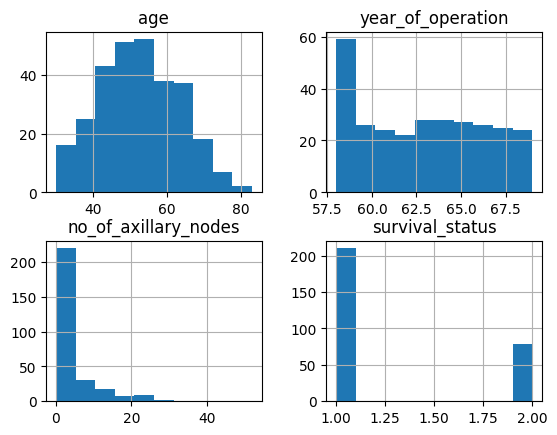

In [348]:
# since all are numerical variables checking distribution of each variable by drawing histograms

dataset.hist()
plt.show()

Observations: age has approx gaussian distribution. year_of_operation has mostly uniform distribution except for maybe some outliers in first year. no_of_auxillary_nodes has value 0 for most of the examples with a trailing long tail of other values. survival_status has unequal class distribution.

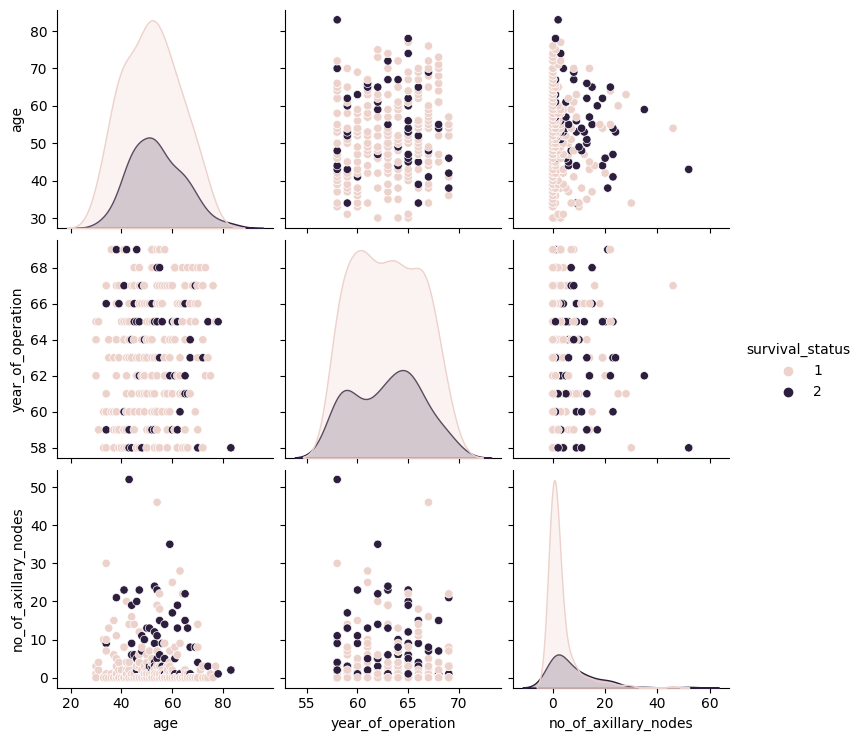

In [349]:
# checking relevance of each attr w.r.t target and co-relation with each other

sns.pairplot(dataset, hue="survival_status")

Observation: None of the attributes are contributing greatly to class prediction. All patients having zero or close to zero nodes survived for more than 5 years, this density decreases as # nodes increases for all age patients. no_of_auxillary_nodes seem to be imp feature out of 3, affecting survival_status the most. 

In [350]:
# checking class count

print(dataset['survival_status'].value_counts())
# in terms of percentage
print(dataset['survival_status'].value_counts(1))

1    210
2     79
Name: survival_status, dtype: int64
1    0.726644
2    0.273356
Name: survival_status, dtype: float64


Observation: Its imbalanced dataset. There is much more samples from class 1 than class 2.

Normalize the data as scales of features are different

In [352]:
# normalize all input features
dataset_norm = dataset.copy()
# using StandardScaler as it follows approx gaussian distribution
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()

dataset_norm['age'] = scaler1.fit_transform(dataset['age'].values.reshape(-1, 1))
dataset_norm['year_of_operation'] = scaler2.fit_transform(dataset['year_of_operation'].values.reshape(-1, 1))
dataset_norm['no_of_axillary_nodes'] = scaler3.fit_transform(dataset['no_of_axillary_nodes'].values.reshape(-1, 1))

dataset_norm.head()

,age,year_of_operation,no_of_axillary_nodes,survival_status
0,-2.065019,0.545455,0.019231,1
1,-2.065019,0.363636,0.057692,1
2,-2.065019,0.636364,0.000000,1
3,-1.972922,0.090909,0.038462,1
4,-1.972922,0.636364,0.076923,1


Identify the target variable & features, Encode target variable

In [354]:
# encoding class attr values as 0/1
dataset_norm['survival_status'] = LabelEncoder().fit_transform(dataset_norm['survival_status'])
print(dataset_norm.head())

# splting data into input & output
X, y = dataset_norm.values[:, :-1], dataset_norm.values[:, -1]
print(X.shape)
print(y.shape)

        age  year_of_operation  no_of_axillary_nodes  survival_status
0 -2.065019           0.545455              0.019231                0
1 -2.065019           0.363636              0.057692                0
2 -2.065019           0.636364              0.000000                0
3 -1.972922           0.090909              0.038462                0
4 -1.972922           0.636364              0.076923                0
(289, 3)
(289,)


Split Data into training & test data sets

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202, 3)
(202,)
(87, 3)
(87,)


1. To remove dulpicate data - Removed duplicates, identical rows. Also, Majority of duplicates are from class 1, this will help a little bit in decresing imbalance.
2. To impute or remove missing data, if present - missing values not present
3. To remove data inconsistencies, if present - No significant data inconsistencies
4. To encode categorical data - All features are numerical but we did one hot encode the target variable (0/1)
5. Normalization technique used - Only age feature follows gaussian distrbution so we standardized it and for others as they do not have gaussian distribution we went with min-max normalization for them.

Deep Neural Network Architecture

In [356]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

In [357]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                40        
                                                                 
 dense_51 (Dense)            (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


1. Number of layers - The problem we are solving is not very complex with input features only being 3 and the dataset is not large either around 300 records. So, to lower chances of overfitting we went with single hidden layer
2. Number of units in each layer - Since we decided on only 1 hidden layer, for starters we kept the neurons size to medium 10, later on deciding on changing it if performance improved by tweaking it.
3. Activation function for hidden layers - We chose to go most common activation for hidden layers i.e. ReLu and then compare its performance with other functions
4. Activation function for output layer - Since its a binary classification problem we chose sigmoid activation with one node
5. Total Number of trainable parameters - Going with fully connected layers, calculated paramters accrding to rule (n+1) * m, where n is no, of inputs (3) and m is no. of nerons in the dense layer (10). We did not have to set this explicitly while model creation, by default it was considered to be fully connected NN and according;y no. of params seems to have set internally as shown in above model summary. 

Configure the training

In [358]:
# copied from internet for f1 score metric during training which is not available by default
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [359]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[f1_score])

Train the model

In [360]:
classifier_results = model.fit(X_train, 
                    y_train, 
                    epochs=200, 
                    batch_size=8, 
                    verbose=True, 
                    validation_data=(X_test,y_test))

Epoch 1/200
26/26 [==============================] - 1s 8ms/step - loss: 0.7465 - f1_score: 0.3659 - val_loss: 0.7389 - val_f1_score: 0.3045
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 0.7195 - f1_score: 0.3457 - val_loss: 0.7147 - val_f1_score: 0.2222
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 0.6999 - f1_score: 0.2144 - val_loss: 0.6938 - val_f1_score: 0.1424
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 0.6825 - f1_score: 0.2035 - val_loss: 0.6787 - val_f1_score: 0.1364
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 0.6692 - f1_score: 0.1269 - val_loss: 0.6652 - val_f1_score: 0.0519
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 0.6579 - f1_score: 0.1058 - val_loss: 0.6531 - val_f1_score: 0.0000e+00
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6471 - f1_score: 0.0769 - val_loss: 0.6445 - val_f1_score: 0.0000e+00
Epoch

26/26 [==============================] - 0s 3ms/step - loss: 0.5286 - f1_score: 0.1359 - val_loss: 0.5644 - val_f1_score: 0.0000e+00
Epoch 114/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5283 - f1_score: 0.2103 - val_loss: 0.5646 - val_f1_score: 0.0000e+00
Epoch 115/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5281 - f1_score: 0.2244 - val_loss: 0.5652 - val_f1_score: 0.0000e+00
Epoch 116/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5281 - f1_score: 0.2090 - val_loss: 0.5652 - val_f1_score: 0.0000e+00
Epoch 117/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5277 - f1_score: 0.1855 - val_loss: 0.5653 - val_f1_score: 0.0000e+00
Epoch 118/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5279 - f1_score: 0.1686 - val_loss: 0.5650 - val_f1_score: 0.0303
Epoch 119/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5276 - f1_score: 0.1557 - val_loss: 0.5650 - val_f1_score: 

1. Metric - Since the datatset is imbalanced, instead of accuracy we chose f1 score as metric. Since keras does not have default implementation of this metric we had to copy the custom implementation from internet and provide to keras.
2. Hyperpatameters - We tried different values of epochs & batch_size and settled on above values based on the performace of each combination. Increasing batch_size from 8 to 16 did not show any visible difference in performace so kept it at 8.
3. Optimizers - We tested f1-score values for 2 generally best choices for optimizer Adam & SGD. For, SGD f1 score came out to be very low so we decided on going with Adam.
4. Loss Function - Since our output activation is sigmoid, we kept cross entropy as loss function.

Test the model

In [361]:
model.evaluate(X_test, y_test)
# output - loss & f1 score

3/3 [==============================] - 0s 3ms/step - loss: 0.5668 - f1_score: 0.2074


[0.5667933821678162, 0.2074074000120163]

Conclusion 

Plotting the training and validation loss. Checking the testing accuracy and loss.

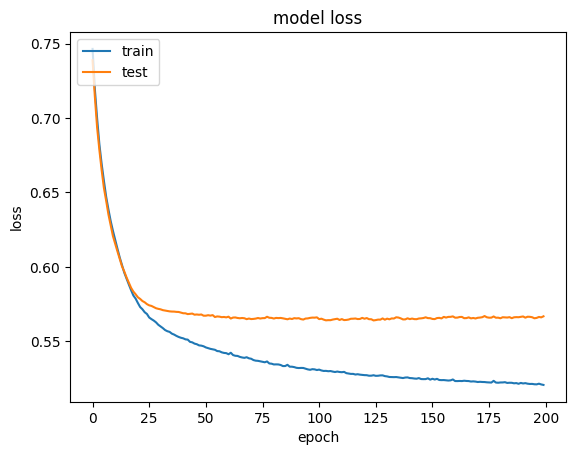

In [362]:
plt.plot(classifier_results.history['loss'])
plt.plot(classifier_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [363]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

# confusion matrix
confusion_mtx = confusion_matrix(y_test, predictions)
print('Confustion matrix = \n',pd.DataFrame(confusion_mtx))

# Classification Report    
print('Classfication report = \n', classification_report(y_test, 
        predictions, target_names=['class 0', 'class 1']))

3/3 [==============================] - 0s 2ms/step
Confustion matrix = 
     0  1
0  62  1
1  21  3
Classfication report = 
               precision    recall  f1-score   support

     class 0       0.75      0.98      0.85        63
     class 1       0.75      0.12      0.21        24

    accuracy                           0.75        87
   macro avg       0.75      0.55      0.53        87
weighted avg       0.75      0.75      0.67        87



1. Since this is survival analysis, this model can be used to predict life expectancy of unknown breast cancer patients wh have just came out of surgery in order to plan the course of their treatment.
2. However, this dataset is pretty old and hence the model will probably fall short of predicting for present scenarios with fair accuracy. We also faced challange for imbalance in dataset which we tried to overcome with choosing appropriate metric instead of going with accuracy. We did not go with oversampling since the imbalance was not severe.
3. We learned that even with starting with generally accepted choices of hyperparameters, activation functions and such, neural network gives faily decent performance which we can further work on improve by finding best parameters by gridSearch and so on. If more relevant data becomes available we can perhaps further the complexity of network from single hidden layer to exploit more performance.